In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
sns.__version__

'0.12.2'

In [31]:
df = pd.read_csv('/kaggle/input/titanic/titanic.csv')

In [32]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [33]:
df.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [34]:
df.sample()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1142,3,0,"Rice, Master. Arthur",male,4.0,4,1,382652,29.125,NaN,Q,NaN,NaN,NaN


In [35]:
df.shape

(1309, 14)

In [36]:
pd.DataFrame(df.age)

,age
0,29.00
1,0.92
2,2.00
3,30.00
4,25.00
...,...
1304,14.50
1305,NaN
1306,26.50
1307,27.00


In [37]:
df[['age', 'boat']]

,age,boat
0,29.00,2
1,0.92,11
2,2.00,NaN
3,30.00,NaN
4,25.00,NaN
...,...,...
1304,14.50,NaN
1305,NaN,NaN
1306,26.50,NaN
1307,27.00,NaN


In [38]:
df.survived.value_counts(normalize=True)*100

survived
0    61.802903
1    38.197097
Name: proportion, dtype: float64

In [39]:
pd.crosstab(df.sex, df.survived)

survived,0,1
sex,,
female,127,339
male,682,161


In [40]:
under_5_years = df[df.age<=5]
under_5_years.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
94,1,1,"Dodge, Master. Washington",male,4.00,0,2,33638,81.8583,A34,S,5,NaN,"San Francisco, CA"
339,2,1,"Becker, Master. Richard F",male,1.00,2,1,230136,39.0000,F4,S,11,NaN,"Guntur, India / Benton Harbour, MI"
340,2,1,"Becker, Miss. Marion Louise",female,4.00,2,1,230136,39.0000,F4,S,11,NaN,"Guntur, India / Benton Harbour, MI"


In [41]:
under_5_years.survived.value_counts()

survived
1    37
0    19
Name: count, dtype: int64

In [42]:
df[df.name.str.contains('allen', case=False)]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
342,2,1,"Becker, Mrs. Allen Oliver (Nellie E Baumgardner)",female,36.0,0,3,230136,39.0000,F4,S,11,NaN,"Guntur, India / Benton Harbour, MI"
618,3,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN,"Lower Clapton, Middlesex or Erdington, Birmingham"


In [43]:
df.query('survived ==1 and embarked=="S" and pclass == 1 and fare> 200' )

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
24,1,1,"Bird, Miss. Ellen",female,29.0,0,0,PC 17483,221.7792,C97,S,8,NaN,NaN
111,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S,10,NaN,"Winnipeg, MB"
112,1,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,19950,263.0000,C23 C25 C27,S,10,NaN,"Winnipeg, MB"
113,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,10,NaN,"Winnipeg, MB"
116,1,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0000,C23 C25 C27,S,10,NaN,"Winnipeg, MB"
180,1,1,"Kreuchen, Miss. Emilie",female,39.0,0,0,24160,211.3375,NaN,S,2,NaN,NaN
193,1,1,"Madill, Miss. Georgette Alexandra",female,15.0,0,1,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
238,1,1,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",female,43.0,0,1,24160,211.3375,B3,S,2,NaN,"St Louis, MO"


In [44]:
df.loc[(df['survived'] == 1)  &  (df['embarked'] == "S") & (df['pclass'] == 1) & (df['fare'] > 200)]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
24,1,1,"Bird, Miss. Ellen",female,29.0,0,0,PC 17483,221.7792,C97,S,8,NaN,NaN
111,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S,10,NaN,"Winnipeg, MB"
112,1,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,19950,263.0000,C23 C25 C27,S,10,NaN,"Winnipeg, MB"
113,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,10,NaN,"Winnipeg, MB"
116,1,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0000,C23 C25 C27,S,10,NaN,"Winnipeg, MB"
180,1,1,"Kreuchen, Miss. Emilie",female,39.0,0,0,24160,211.3375,NaN,S,2,NaN,NaN
193,1,1,"Madill, Miss. Georgette Alexandra",female,15.0,0,1,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
238,1,1,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",female,43.0,0,1,24160,211.3375,B3,S,2,NaN,"St Louis, MO"


In [45]:
round(df.describe(),2)

,pclass,survived,age,sibsp,parch,fare,body
count,1309.00,1309.00,1046.00,1309.00,1309.00,1308.00,121.00
mean,2.29,0.38,29.88,0.50,0.39,33.30,160.81
std,0.84,0.49,14.41,1.04,0.87,51.76,97.70
min,1.00,0.00,0.17,0.00,0.00,0.00,1.00
25%,2.00,0.00,21.00,0.00,0.00,7.90,72.00
50%,3.00,0.00,28.00,0.00,0.00,14.45,155.00
75%,3.00,1.00,39.00,1.00,0.00,31.28,256.00
max,3.00,1.00,80.00,8.00,9.00,512.33,328.00


In [46]:
for col in df.select_dtypes(include='object'):
    print(f"Unique values in {col}:")
    print(df[col].value_counts())
    print("\n")

Unique values in name:
name
Connolly, Miss. Kate             2
Kelly, Mr. James                 2
Allen, Miss. Elisabeth Walton    1
Ilmakangas, Miss. Ida Livija     1
Ilieff, Mr. Ylio                 1
                                ..
Hart, Miss. Eva Miriam           1
Harris, Mr. Walter               1
Harris, Mr. George               1
Harper, Rev. John                1
Zimmerman, Mr. Leo               1
Name: count, Length: 1307, dtype: int64


Unique values in sex:
sex
male      843
female    466
Name: count, dtype: int64


Unique values in ticket:
ticket
CA. 2343    11
1601         8
CA 2144      8
PC 17608     7
347077       7
            ..
373450       1
2223         1
350046       1
3101281      1
315082       1
Name: count, Length: 929, dtype: int64


Unique values in cabin:
cabin
C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
F4                 4
F33                4
                  ..
C132               1
E60                1
B52 B54 B56        1
C49   

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


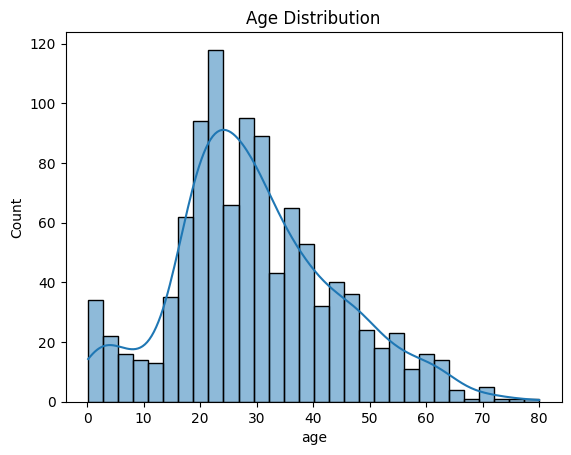

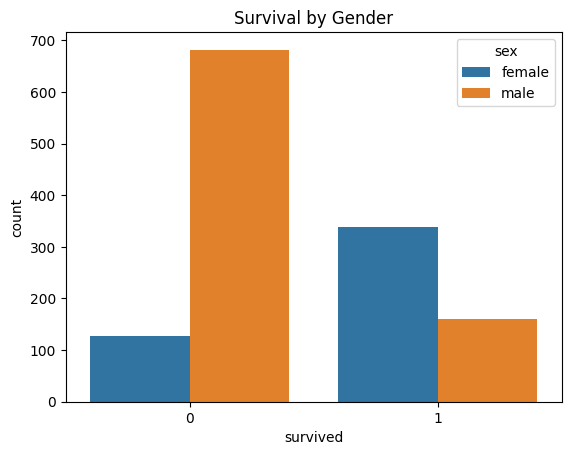

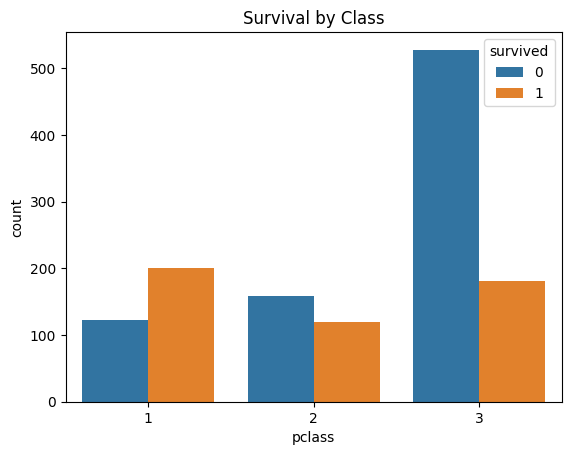

In [47]:
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

sns.countplot(x='survived', hue='sex', data=df)
plt.title("Survival by Gender")
plt.show()

sns.countplot(x='pclass', hue='survived', data=df)
plt.title("Survival by Class")
plt.show()


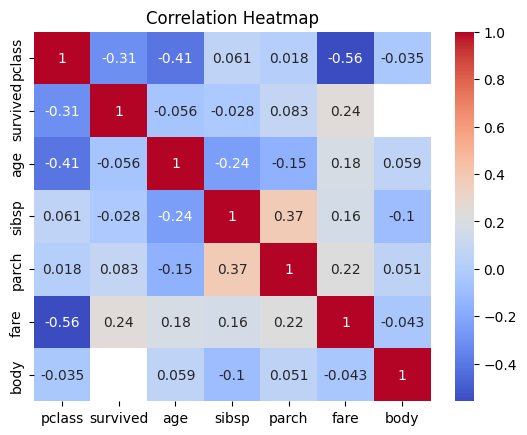

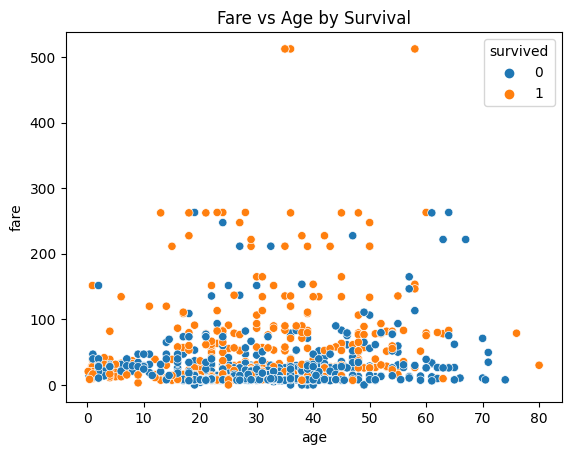

In [48]:
numeric_df = df.select_dtypes(include=['number'])  # فقط ستون‌های عددی
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


sns.scatterplot(x='age', y='fare', hue='survived', data=df)
plt.title("Fare vs Age by Survival")
plt.show()


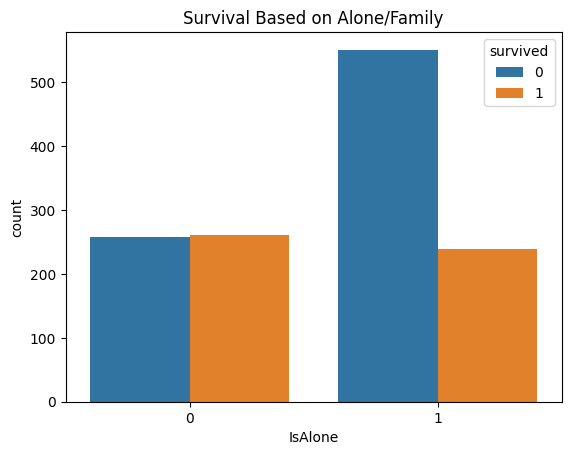

In [49]:

df['FamilySize'] = df['sibsp'] + df['parch']
df['IsAlone'] = (df['FamilySize'] == 0).astype(int)

sns.countplot(x='IsAlone', hue='survived', data=df)
plt.title("Survival Based on Alone/Family")
plt.show()


In [50]:
df.groupby('IsAlone')['survived'].mean()*100


IsAlone
0    50.289017
1    30.253165
Name: survived, dtype: float64

In [59]:
import plotly.express as px

fig = px.histogram(
    df, 
    x="sex", 
    color="survived", 
    barmode="group",
    labels={"sex": "Gender", "survived": "Survived (1=Yes, 0=No)"},
    title="Survival Distribution by Gender"
)
fig.show()


In [52]:
fig = px.density_heatmap(
    df, 
    x="age", 
    y="survived", 
    nbinsx=30, 
    color_continuous_scale="Viridis",
    labels={"survived": "Survived (1=Yes, 0=No)", "age": "Age"},
    title="Age Distribution by Survival Status"
)
fig.show()


In [53]:
fig = px.violin(
    df, 
    y="fare", 
    x="pclass", 
    color="survived", 
    box=True, 
    points="all",
    labels={"Fare": "Fare (Ticket Price)", "Pclass": "Passenger Class"},
    title="Fare Distribution by Passenger Class and Survival Status"
)
fig.show()


In [54]:
embarked_survival = df.groupby("embarked")["survived"].mean().reset_index()

fig = px.pie(
    embarked_survival, 
    names="embarked", 
    values="survived",
    labels={"embarked": "Port of Embarkation", "survived": "Survival Rate"},
    title="Survival Rate by Embarkation Port"
)
fig.show()


In [55]:
import plotly.express as px

fig = px.scatter(
    df, 
    x="age", 
    y="fare", 
    color="survived",
    size="FamilySize",
    hover_name="name",
    labels={"fare": "Fare (Ticket Price)", "age": "Age"},
    title="Age vs Fare by Survival Status"
)
fig.show()


In [56]:
pivot = df.pivot_table(values="survived", index="sex", columns="pclass", aggfunc='mean')

fig = px.imshow(
    pivot, 
    text_auto=True, 
    color_continuous_scale="Blues",
    title="Survival Rate by Gender and Class",
    labels=dict(x="Passenger Class", y="Gender", color="Survival Rate")
)
fig.show()


In [57]:
fig = px.pie(
    df, 
    names='sex', 
    values='survived', 
    color='sex',
    title="Survival Rate by Gender",
    hover_data=['survived'],
    labels={'sex': 'Gender', 'survived': 'Survived'}
)
fig.show()



In [58]:
import altair as alt

alt.data_transformers.disable_max_rows()

chart = alt.Chart(df).mark_bar().encode(
    x='pclass:O',
    y='mean(survived):Q',
    color='pclass:N',
    tooltip=['pclass', 'mean(survived)']
).properties(
    title="Survival Rate by Passenger Class"
)

chart.interactive()


alt.Chart(...)